# Práctica 1 Introducción al Machine Learning. Métricas de clasificación y regresión (I).

# Secuencia de tareas o "pipeline" en ciencia de datos y en machine learning.
En la figura de esta celda se muestra el flujo de las tareas más importantes o "pipeline" en un proyecto de ciencia de datos. Los algoritmos, procedimientos y técnicas de machine learning que se van a estudiar en esta asignatura sirven especialmente para  planificar y construir el modelo de machine learning, es decir, para llevar a cabo los pasos 3 y 4 de la figura. En cierta medida también las tareas del paso 2, en el que se preparan los datos y del último paso, el de operacionalizar, en el que se lanza, monitoriza y mantiene el proyecto realizado.

![Flujo de tareas pipeline ciencia de datos.png](<attachment:Flujo de tareas pipeline ciencia de datos.png>)
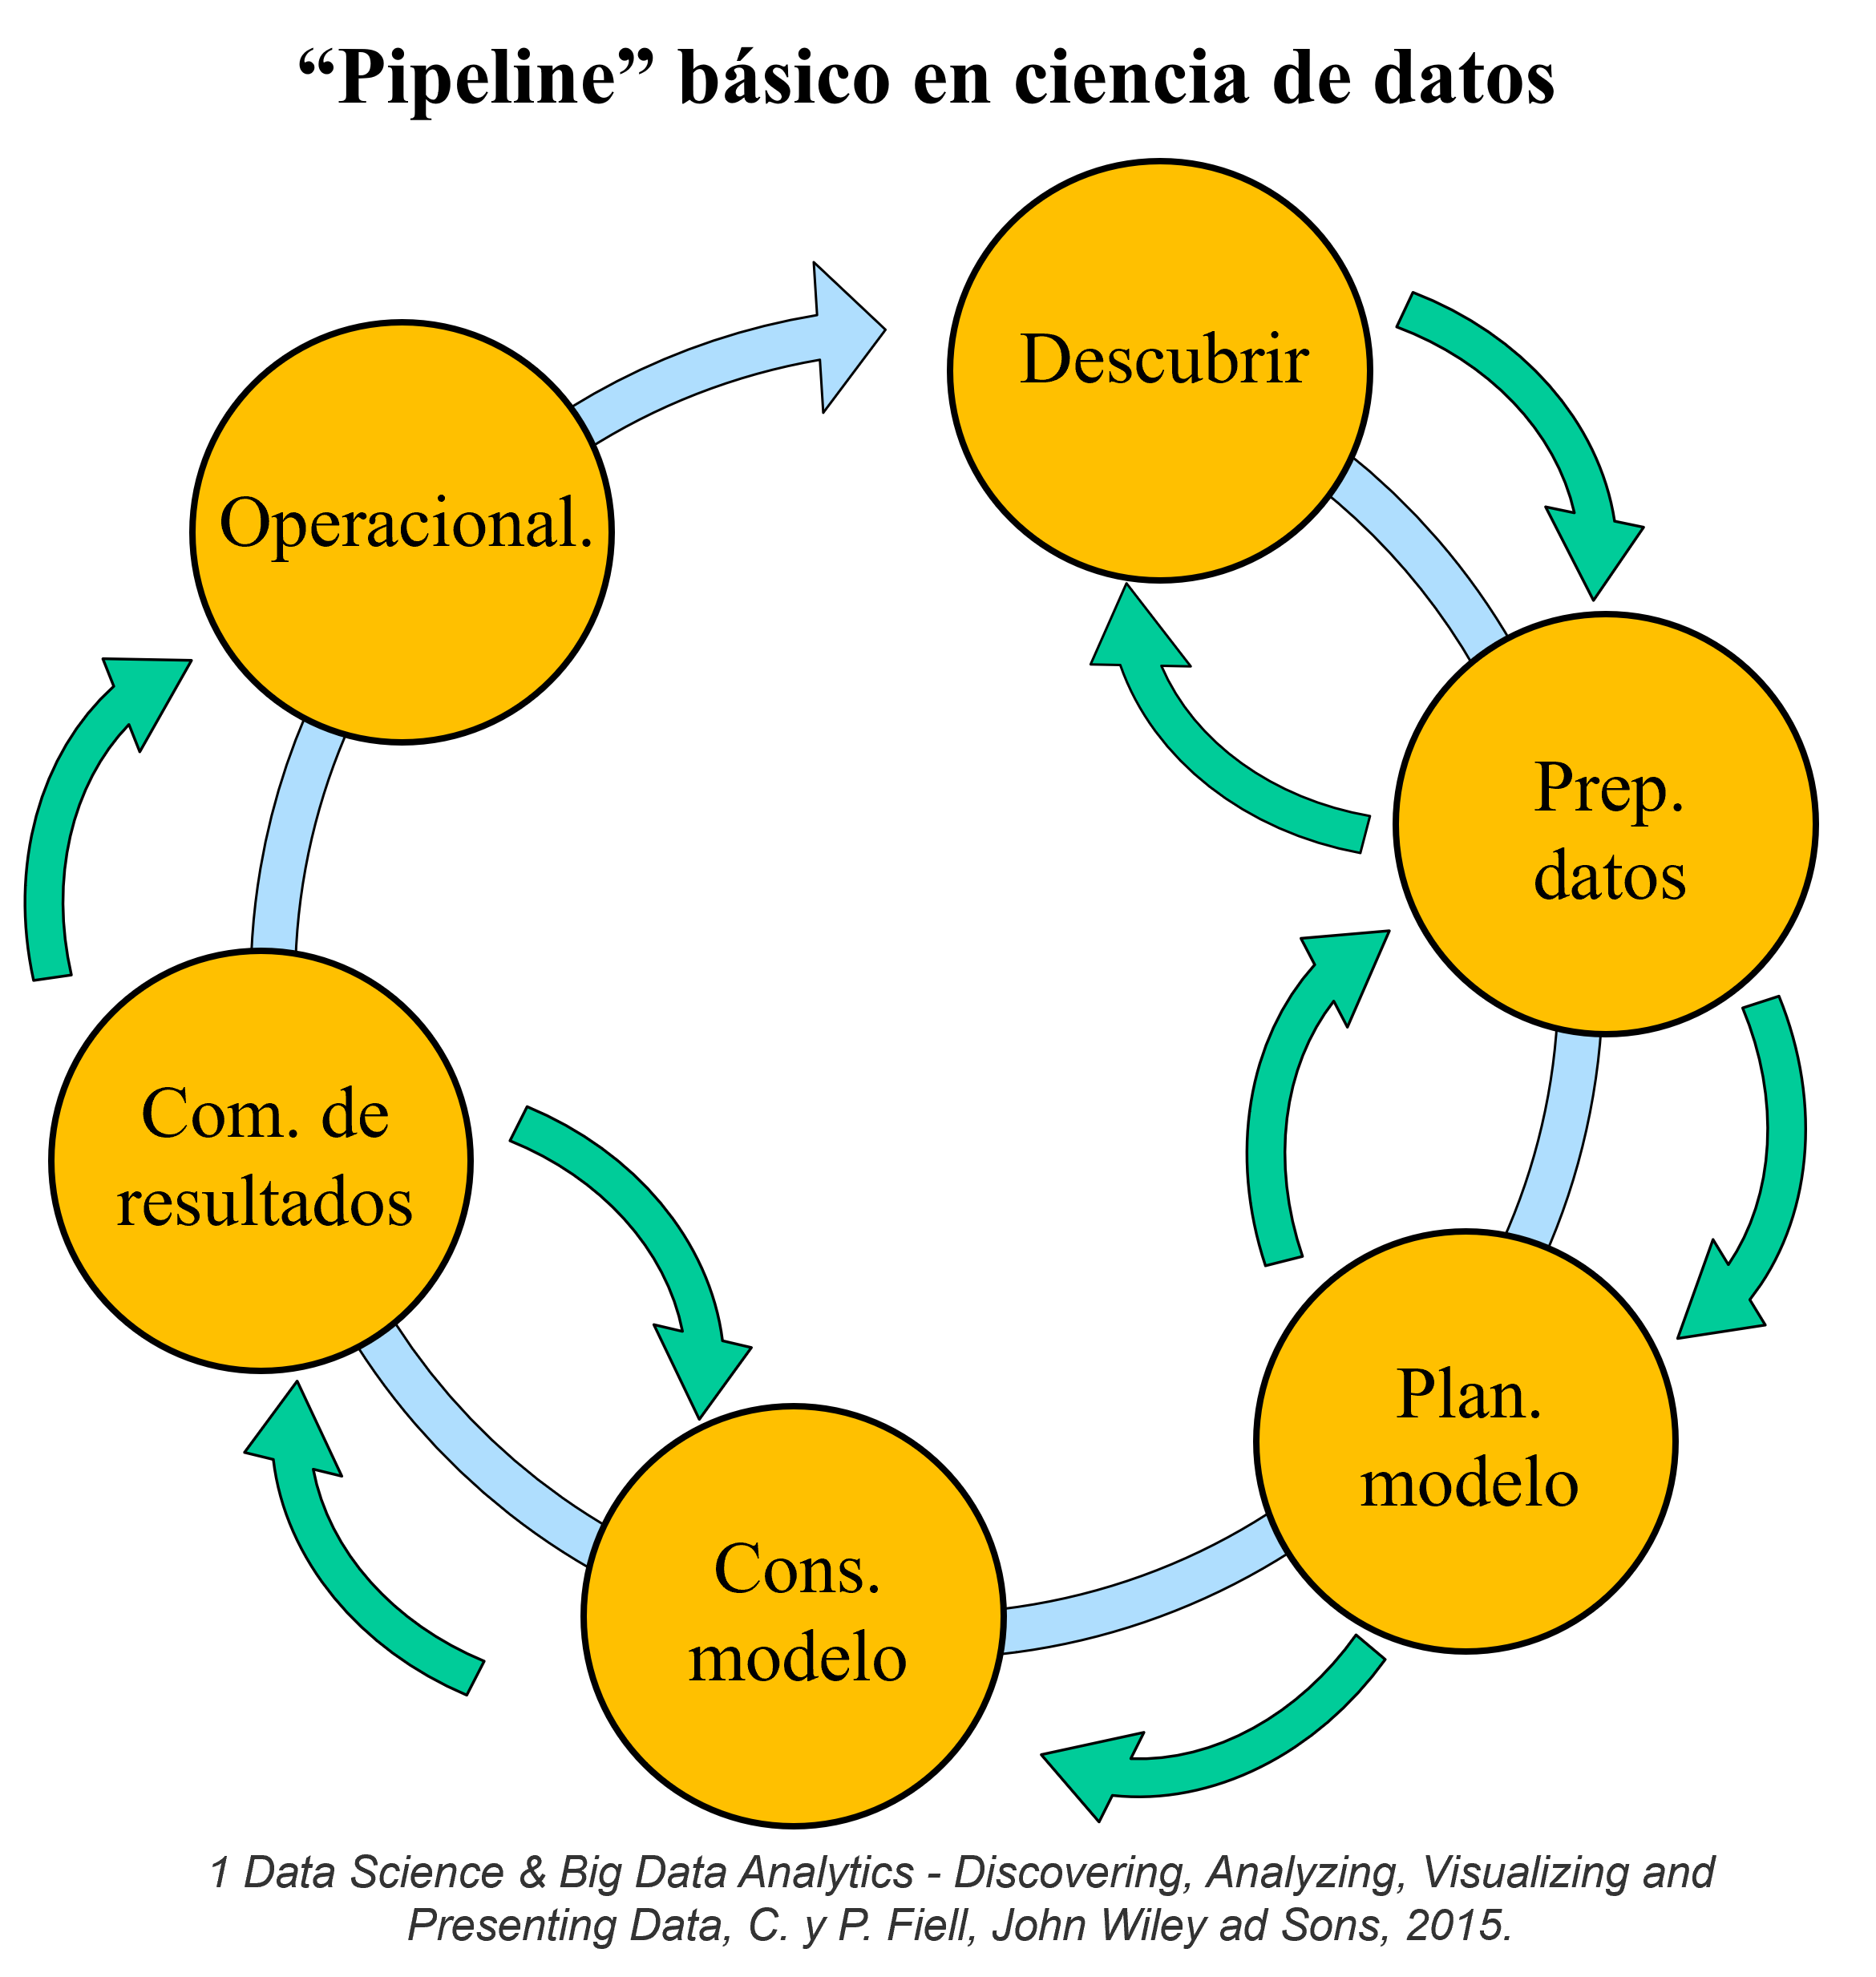

Para planificar y construir el modelo de machine learning hay que seguir una serie de fases. En la siguiente imagen se muestran dichas fases. En esta y en las siguientes sesiones se trabajará en diferentes aspectos de cada una de las fases mostradas.

![Flujo de tareas pipeline machine learning.png](<attachment:Flujo de tareas pipeline machine learning.png>)
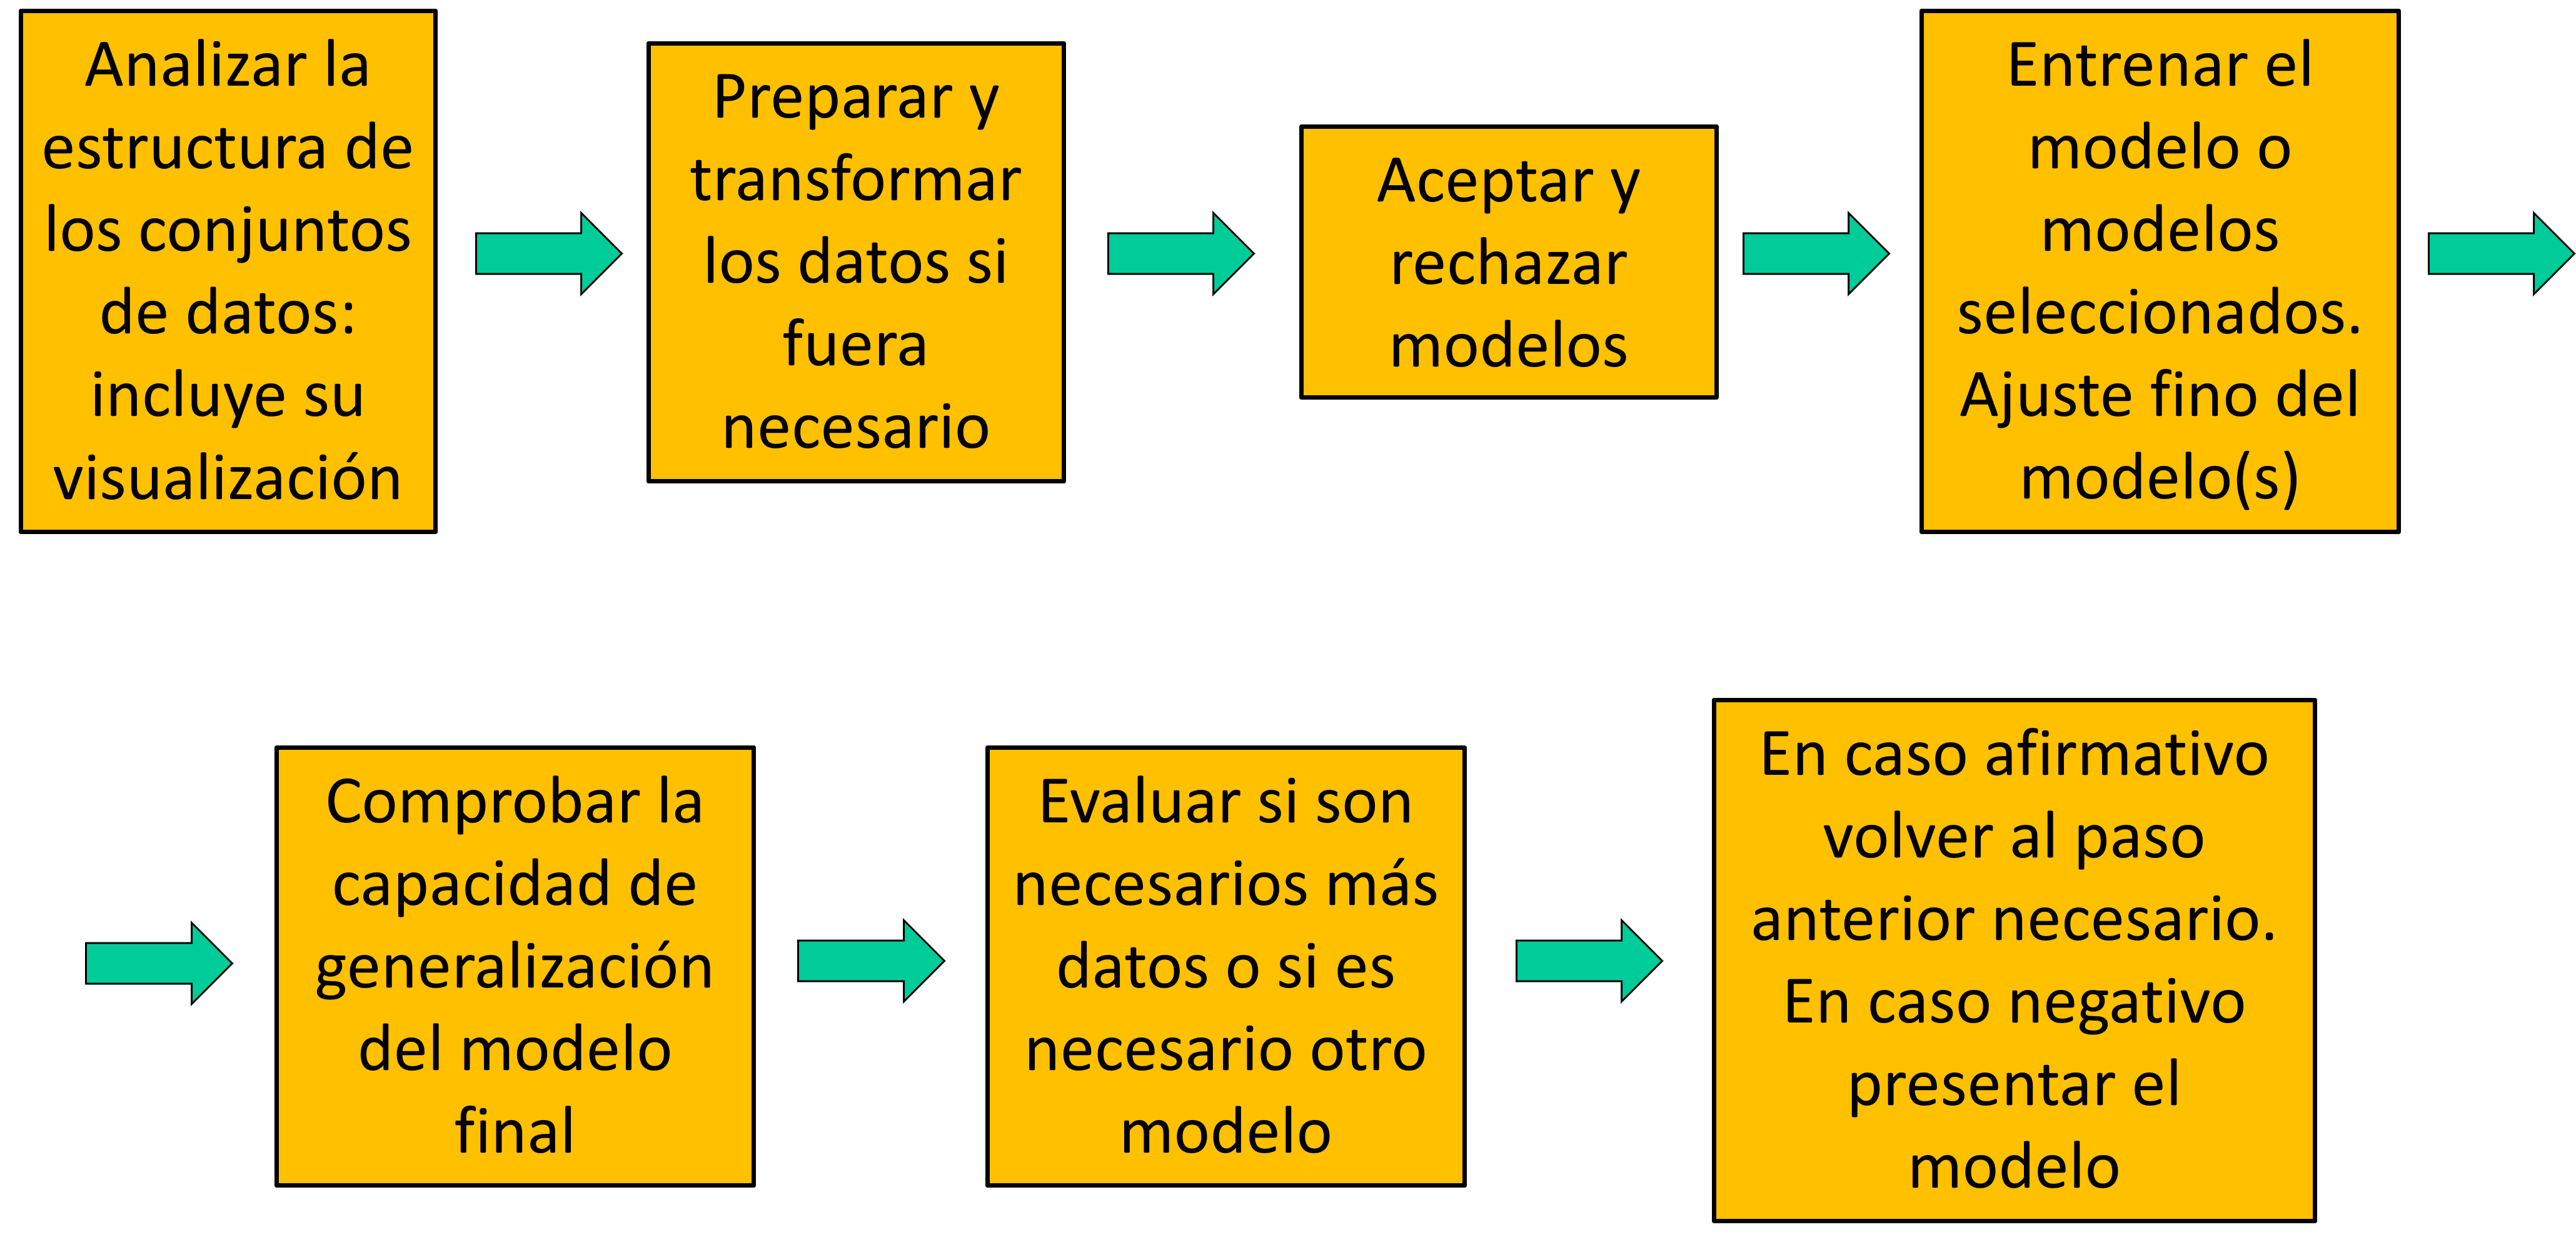

# Scikit-learn

En esta asignatura se va a emplear *Scikit-learn* como la biblioteca principal o API (" Application Programming Interface") de técnicas de machine learning. *Scikit-learn* contiene las principales técnicas necesarias en la asignatura y además está especialmente bien construida, por lo que es apropiada para llevar a cabo las prácticas. Sus principales características son:

<font color='blue'> Consistencia  </font>: todos los objetos son consistentes y poseen un interfaz común y simple. Los principales métodos de los objetos son:


<ul>
<li>Estimadores: todo objeto, que constituye un modelo de machine learning, puede estimar los parámetros del modelo mediante el método <i>fit()</i>. Cualquier parámetro empleado como argumento de <i>fit()</i> se considera un hiperparámetro. </li>
<li>Transformadores: algunos estimadores pueden transformar el conjunto de datos sobre el que están operando. El método que se utiliza en este caso es <i>transform()</i>. Se pueden estimar los parámetros del estimador y aplicar la transformación en la misma operación mediante el método <i>fit_transform()</i>. </li>
<li>Predictores: algunos estimadores pueden realizar predicciones dado un conjunto de datos. El método se denomina <i>predict()</i>. Para obtener el acierto del estimador se puede emplear el método <i>score()</i>. </li>
</ul>
   

<font color='blue'> Inspección  </font>: los hiperparámetros empleados y los parámetros estimados se pueden consultar a través de variables. Por ejemplo, en algunos estimadores con la variable *strategy* y *statistics_* respectivamente.

<font color='blue'> No hay proliferación de clases  </font>: no genera nuevas clases propias. Los conjuntos de datos se representan con vectores de tipo *Numpy* o con matrices dispersas de *SciPy*. Los hiperparámetros son cadenas de caracteres o números.

<font color='blue'> Composición </font>: las clases pueden combinarse para formar una secuencia de tareas o "pipeline" en una única línea de código. Este procedimiento emplea la clase *Pipeline*, una vez definido el "pipeline" puede aplicarse a distintos conjuntos de datos. Por ejemplo, se puede transformar un conjunto de datos para cambiar la escala de las características y luego aplicar un modelo de machine learning determinado a ese conjunto de datos transformado.

<font color='blue'> Valores por defecto razonables </font>: se proporcionan valores por defecto razonables, que permiten empezar a trabajar y ganar experiencia con rapidez.




## Importación de bibliotecas. 

Tras instalar la bilioteca *Scikit-learn*, importamos las bibliotecas auxiliares necesarias. Si no tiene alguna instalada, puede seguir el mismo procedimiento seguido con *Scikit-learn* para instalarla. En esta sesión emplearemos:

<font color='blue'> Numpy  </font>: para alimentar las clases de *Scikit-learn* y para tratar los datos generados por las clases de *Scikit-learn*.

<font color='blue'> Matplotlib  </font>: para dibujar gráficas. 

In [17]:
# Importación de bibliotecas auxiliares
import numpy as np 
from matplotlib import pyplot as plt

## Métricas para clasificación. 

En primer lugar, vamos a utilizar las métricas vistas en clase de teoría para medir el rendimiento de una técnica de Machine Learning. Generaremos clases de forma sintética, es decir, clases que no corresponden a un caso real para un caso de clasificación binaria.

**Generación de clases**

Vamos a generar dos clases mediante la clase de `Scikit-learn` llamada `make_classification`. Esta clase crea clases distribuidas alrededor de puntos que denomina vértices siguiendo una distribución gaussiana de desviación estándar 1. Sus principales parámetros son:

El parámetro <font color='blue'> n_features</font> determina el número de características. 

El parámetro <font color='blue'>n_classes</font> es el número de clases, el valor por defecto es 2. 

<font color='blue'>n_clusters_per_class</font> es el número de 'clusters' por clase. 

Finalmente, <font color='blue'>class_sep</font> separa en mayor o en menor medida las clases/clusters haciendo más o menos sencilla la tarea de clasificación, respectivamente.

Además, emplearemos <font color='blue'>random_state</font>  para que el generador aleatorio utilice una semilla 
determinada y así que cada vez que ejecutemos la función siempre se obtengan los mismas valores de x e y

En este primer ejemplo generaremos dos clases con una única característica.

El tamaño de la clase 0 es: (49, 1)
El tamaño de la clase 1 es: (51, 1)


Text(0.5, 0, 'Característica (x)')

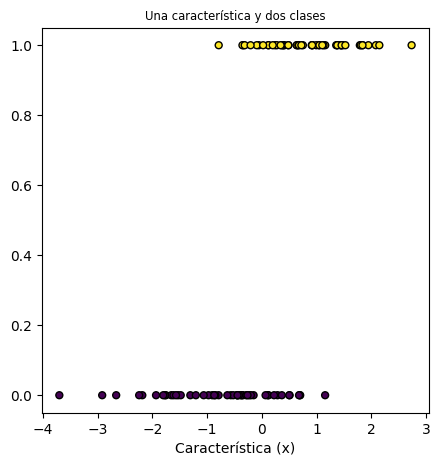

In [18]:
# Importamos la clase necesaria para generar las clases
from sklearn.datasets import make_classification


# Generamos las dos clases para un total de puntos igual a numero_puntos
numero_puntos = 100
# Fijamos la separación de las clases igual a un valor no elevado
# Utilizamos el parámetro random_state para que el generador aleatorio utilice una semilla 
# determinada y así que cada vez que ejecutemos la función siempre se obtengan los mismas valores 
# de x e y
x, y = make_classification(
    n_samples=numero_puntos, n_features=1, n_redundant=0, n_informative=1, 
    n_classes=2, n_clusters_per_class=1, class_sep=0.75, random_state=20
)

# Los índices del vector y que corresponden a la clase 0 y a la clase 1
indices_clase_0 = y==0
indices_clase_1 = y==1

# Las características y etiquetas u objetivos de la clase 0 y de la clase 1
x_clase_0 = x[indices_clase_0]
x_clase_1 = x[indices_clase_1]
y_clase_0 = y[indices_clase_0]
y_clase_1 = y[indices_clase_1]

print(f'El tamaño de la clase 0 es: {x_clase_0.shape}' )
print(f'El tamaño de la clase 1 es: {x_clase_1.shape}' )

# Para dibujar mostraremos en el eje de abcisas los valores de la característica
# En el eje de ordenadas mostraremos la clase de cada característica del eje x
# La clase 1 tiene un valor de ordenada igual a 1
# La clase 0 tiene un valor de ordenada igual a 0
# Se emplean círculos y cada clase tiene un color diferente
plt.figure(figsize=(5, 5))
plt.title("Una característica y dos clases", fontsize="small")
plt.scatter(x, y, marker="o", c=y, s=25, edgecolor="k")
# Título del eje x
plt.xlabel('Característica (x)')


**Clasificador de tipo lineal**

En primer lugar vamos a emplear un clasificador lineal, un polinomio de grado 1, para separar las dos clases creadas. La clase `SGDClassifier` es un clasificador lineal en el que los parámetros se estiman mediante el algoritmo de Descenso de Gradiente Estocástico (SGD, "Stochastic Gradient Descent"). No vamos a estudiar en detalle cómo es este clasificador ya que el propósito es emplearlo como herramienta para generar predicciones y así poder analizar las métricas de clasificación. Este clasificador posee una función de decisión cuya ecuación es:

$$
\begin{equation*}
    f(x) = w x + b 
\end{equation*}
$$

Las cuatro primeras características y predicciones
[[-0.56875664  0.        ]
 [-1.52948372  0.        ]
 [ 0.12031245  1.        ]
 [ 1.43979642  1.        ]]


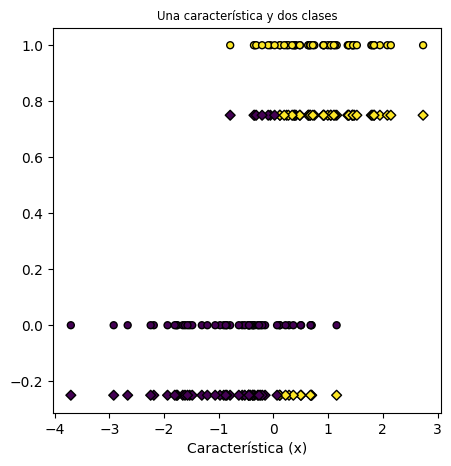

In [19]:
# Importamos la clase de la técnica de clasificación de Machine Learning que vamos a emplear
from sklearn.linear_model import SGDClassifier

# Instanciamos el clasificador, no cambiamos el valor por defecto de ningún hiperparámetro
# Solamente fijamos la semilla de la inicialización del algoritmo para asegurar la reproducibilidad
clasificador_sgd = SGDClassifier(random_state=10)

# Estimación de los parámetros del modelo para el conjunto de ejemplos, datos
clasificador_sgd.fit(x, y)

# Predicción de los valores. y_pred son los valores de salida, las predicciones, del clasificador
# La salida del clasificador produce valores de 0 o de 1
y_pred = clasificador_sgd.predict(x)
# Varias predicciones, valores de salida del modelo
print('Las cuatro primeras características y predicciones')
print(np.hstack((x[0:4], y_pred.reshape(-1, 1)[0:4])))



# Dibujamos los ejemplos 
plt.figure(figsize=(5, 5))
plt.title("Una característica y dos clases", fontsize="small")
plt.scatter(x, y, marker="o", c=y, s=25, edgecolor="k")
plt.xlabel('Característica (x)')

# Dibujamos la predicción en una línea de eje de ordenadas igual 
# a la predicción menos 0,25 para ver mejor los resultados. 
# Utilizamos además como símbolo un diamante
eje_y_prediccion = y - 0.25
plt.scatter(x, eje_y_prediccion, marker="D", c=y_pred, s=25, edgecolor="k")



**Función de decisión y umbral de discriminación**

La función de decisión que genera el clasificador permite obtener predicciones para las características, es decir, salidas del modelo para las entradas del modelo. En la siguiente celda se muestra cómo obtener los coeficientes del modelo que permiten generar la función de decisión. Los valores también se podrían haber obtenido con el método `decision_function`.

In [20]:
# Parámetros de la función de decisión: es una recta

# Para ver la recta que genera el modelo necesitamos los coeficientes de la recta
w =  clasificador_sgd.coef_
b = clasificador_sgd.intercept_
print(f'El coeficiente w es {w}')
print(f'El bias o intercepto b es {b}')

El coeficiente w es [[3.5652346]]
El bias o intercepto b es [-0.31317629]


Ahora vamos a dibujar la función de decisión del clasificador entrenado. Como se observa en el dibujo es una recta; para cada nuevo dato de entrada el clasificador calcula el valor de la recta, que es un número real ($R$). Para que la predicción sea un 0 o un 1 es necesario la utilización de un umbral de discriminación. Si el valor real supera el umbral, entonces se asigna como valor de salida un 1, si es menor un 0. 

Los valores de la función de decisión se pueden llamar "puntuaciones" ("score"). Por el momento, vamos a denorminarlos con un nombre particular que hace referencia al tipo de modelo empleado.

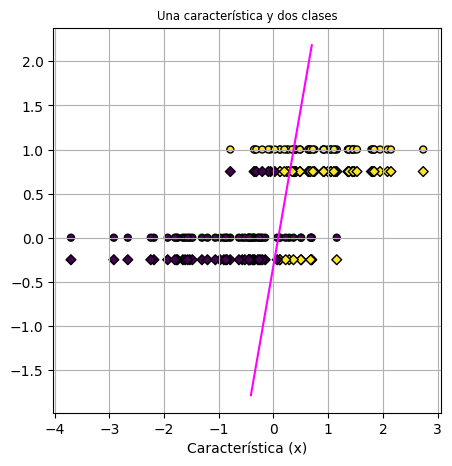

In [21]:
# Vector de características
ini_x = b-0.10      # Valor mínimo de característica
fin_x = +0.70      # Valor máximo de característica
num_puntos_frontera = 1000
vector_x = np.linspace(ini_x, fin_x, num_puntos_frontera)  # Vector de coordenadas en la característica x
vector_x = vector_x.reshape(-1, 1)

# Función de decisión evaluada en el vector_x
valor_recta_modelo = w * vector_x + b

# Dibujamos los datos 
plt.figure(figsize=(5, 5))
plt.title("Una característica y dos clases", fontsize="small")
plt.scatter(x, y, marker="o", c=y, s=25, edgecolor="k")
plt.xlabel('Característica (x)')


# Dibujamos la predicción en una línea de eje de ordenadas igual 
# a la predicción menos 0,25 para ver mejor los resultados. 
# Utilizamos además como símbolo un diamante
eje_y_prediccion = y - 0.25
plt.scatter(x, eje_y_prediccion, marker="D", c=y_pred, s=25, edgecolor="k")

# Añadimos la frontera de decisión
plt.plot(vector_x, valor_recta_modelo, c='magenta')

# Añadimos la rejilla para tener una referencia mejor
plt.grid()


**Cálculo del rendimiento del clasificador**

Como se ha explicado en la introducción, los estimadores de `Scikit-learn` posee un método llamado `score()` para calcular el acierto del estimador. En la siguiente celda se emplea este método para mostrar el acierto. En el siguiente punto mostraremos otras métricas y se deducirá cómo se calcula el acierto o "score".

In [22]:
# Obtenemos el porcentaje de acierto al clasificar los datos: empleamos el método score
acierto = clasificador_sgd.score(x, y)
print("Acierto cuando es:")
# Resultados con tres decimales
print(round(acierto,3))

Acierto cuando es:
0.81


**Métricas de clasificación**

Existen varias métricas para medir el rendimiento de un clasificador. Las principales derivan de la **matiz de confusión** y son la **exactitud** ("accuracy"), la **precisión** ("precision") y la **sensibilidad o exahustividad** ("recall"). A partir de la precisión y la sensibilidad se obtiene la **puntuación F1**. En la siguiente celda se muestra el código para obtener la matriz de confusión y la exactitud. El resto de métricas se obtienen de la misma forma que la métrica de exactitud.

In [23]:
# Importamos la clase matriz confusión 
# Importación de los métodos requeridos
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Las predicciones y_pred se han obtenido en una celda anterior
# Obtención de la matriz de confusión
matriz_confusion = confusion_matrix(y, y_pred)
print("La matriz de confusión es:")
print(matriz_confusion)

# Obtención de la exactitud
exactitud = accuracy_score(y, y_pred)
decimales = 4
print("La exactitud es: ")
print(round(exactitud,decimales))

La matriz de confusión es:
[[38 11]
 [ 8 43]]
La exactitud es: 
0.81


La matriz de confusión se puede visualizar con la función `ConfusionMatrixDisplay`.

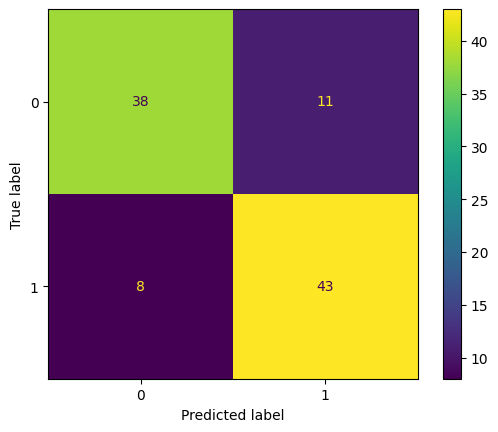

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=matriz_confusion).plot()

**Ejercicio 1: programación de una función que devuelve la matriz de confusión y las métricas**

Programe una función que devuelva la matriz de confusión y las métricas mencionadas para un modelo de machine learning, un conjunto de objetivos o etiquetas y un conjunto de predicciones (valores de salida el modelo). Muestre por pantalla las variables devueltas por la función.

**Ejercicio 2: valores de las métricas para el caso de una característica**

Calcule los valores de las métricas para la matriz de confusión anterior. 

Según los valores obtenidos en las métricas, ¿a qué métrica corresponde el valor de acierto que ofrece el método `score()`?


## Métricas para regresión. 



**Generación de datos**

A continuación vamos a emplear una métrica para medir el rendimiento de una técnica de Machine Learning en una tarea de regresión. Además, estudiaremos el concepto de sesgo y varianza de un modelo. De nuevo, generaremos datos de forma sintética.

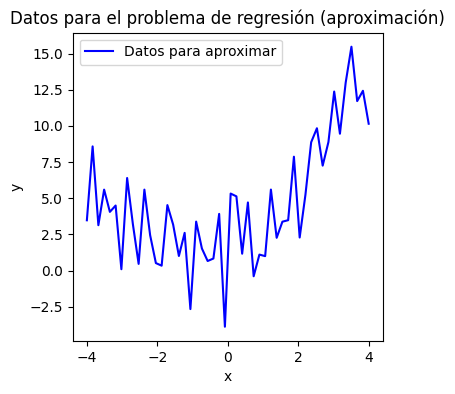

In [25]:
# Fijamos la semilla del generados de números aleatorios de numpy 
# para que obtener siempre los mismos resultados
semilla = 30
np.random.seed(semilla)

# Para obtener los datos escribimos una función
def obtencion_datos(ini_x, fin_x, num_puntos, constante_ruido):
    # Característica: números equiespaciados entre ini_x y fin_x
    
    x =np.linspace(ini_x, fin_x, num_puntos)
    x = x.reshape(-1,1)
    

    # Ruido aleatorio según una distribución normal (gaussiana)
    ruido = constante_ruido * np.random.randn(num_puntos, 1)

    # Objetivo: función no-lineal en x a la que añadimos ruido 
    y_limpia = 0.5*x ** 2 + x + 2
    y = y_limpia + ruido

    return x,y,y_limpia

# Función para generar datos para el problema de regresión
ini_x = -4 
fin_x = 4 
num_puntos = 50
constante_ruido = 2
x, y, y_limpia = obtencion_datos(ini_x, fin_x, num_puntos, constante_ruido)

# Dibujamos la gráfica con los datos
plt.figure(figsize=(4, 4))
plt.plot(x, y, "b-", label='Datos para aproximar')
plt.title('Datos para el problema de regresión (aproximación)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

**Regresor lineal: polinomio de grado 1**

En primer lugar, vamos a emplear un regresor o aproximador de tipo lineal para aproximar los datos generados. La clase `LinearRegression()` proporciona los parámetros del modelo de ajuste de mínimos cuadrados. Utiliza los habituales métodos `fit()` y `predict()`. En la siguiente celda se utilizan estos métodos para realizar la predicción.

In [26]:
# Importamos la clase para aplicar un ajuste lineal a los datos
from sklearn.linear_model import LinearRegression

# Instanciamos el regresor o aproximador: modelo lineal
aproximador_lineal = LinearRegression()

# Estimación de los parámetros del modelo regresor
aproximador_lineal.fit(x, y)

# Predicción de los valores
y_sal_lineal = aproximador_lineal.predict(x)



A continuación, se programa la funcion para dibujar los resultados: se muestran los objetivos respecto a las características, unidos por líneas rectas, y las salidas del modelo respecto a las características unidas asimismo por líneas rectas de otro color. Los valores de las características se ordenan de menor a mayor y ese orden se aplica a los objetivos; esta operación permite visualizar mejor los datos en el caso de que no estén ordenados.

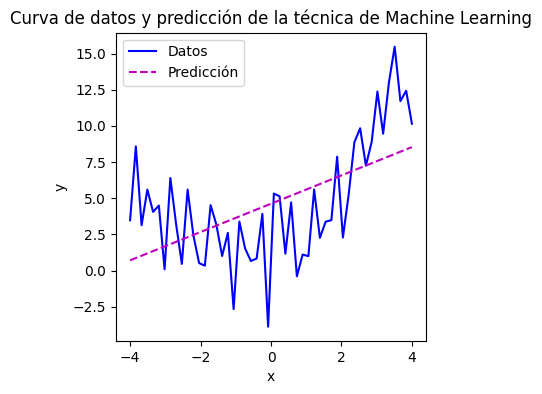

In [27]:
# Función para dibujar los datos de entrada y salida y las predicciones
def dibuja_ajuste_datos_regresion(x, y, x_entrada, y_sal):
    
    # Ordenamos los valores por si estuvieran desordenados
    indices = np.argsort(x[:,0], axis=0)
    x = x[indices]
    y = y[indices]

    indices = np.argsort(x_entrada[:,0])
    x_entrada = x_entrada[indices]
    y_sal = y_sal[indices]
    
    plt.figure(figsize=(4, 4))
    plt.plot(x, y, "b-", label="Datos")
    plt.plot(x_entrada, y_sal, "m--", label="Predicción")

    plt.title('Curva de datos y predicción de la técnica de Machine Learning')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

# Dibujamos el resultado y añadimos los datos originales sin ruido para comparar
dibuja_ajuste_datos_regresion(x, y, x, y_sal_lineal)

**Métricas de regresión**

Para estudiar el rendimiento del modelo empleado empleamos el Error cuadrátrico medio (MSE):

$$
\begin{equation*}
    MSE({\bf w})=\frac{1}{N} \sum_{n=1}^N \{ y(x_n, {\bf w})- t_n \}^2 
\end{equation*}
$$

En la siguiente celda de código se importa la función correspondiente a la métrica anterior y se obtiene el resultado para el modelo lineal.


In [28]:
# Importamos la función de cálculo de MSE
from sklearn.metrics import mean_squared_error

error_MSE_regresor_lineal = mean_squared_error(y, y_sal_lineal)

numero_decimales = 3
print(f'El error cuadrático medio es: {round(error_MSE_regresor_lineal,numero_decimales)}')


El error cuadrático medio es: 11.944


**Regresor lineal de tipo polinomial (grado superior a 1)**

Ahora vamos a emplear un regresor polinomial de grado superior a 1, que puede llegar a ser mucho más complejo polinomio de orden 1. Emplearemos la clase `PolynomialFeatures()` en combinación con un regresor lineal para poder generar un polinomio de grado deseado. La clase `PolynomialFeatures()` eleva los valores de entrada a las potencias del polinomio. Con esos valores de entrada elevados a las potencias necesarias se construye un regresor lineal de modo que el modelo completo es un polinomio. El polinomio tendrá un grado igual a 40.


In [29]:
# Importamos la clase que permite elevar a potencias
from sklearn.preprocessing import PolynomialFeatures

# Instanciamos la clase PolynomialFeatures
orden_polinomio = 40
poly = PolynomialFeatures(degree=orden_polinomio)
# Se calculan las potencias de x y se guardan para ello empleamos el método fit_transform
x_elevado_potencias = poly.fit_transform(x)

# Aproximador lineal
aproximador_polinomio = LinearRegression()
aproximador_polinomio.fit(x_elevado_potencias, y)
# Valores de salida del polinomio que mejor se ajusta a los datos {x,y}
y_sal_polinomio = aproximador_polinomio.predict(x_elevado_potencias)

Al igual que con el regresor lineal, dibujamos los resultados.

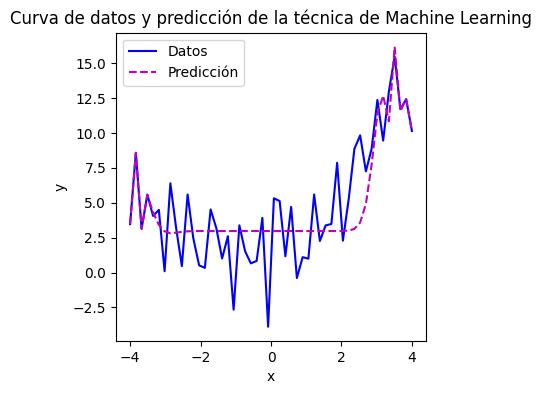

In [30]:
# Dibujamos el resultado y añadimos los datos originales sin ruido para comparar
dibuja_ajuste_datos_regresion(x, y, x, y_sal_polinomio)

Finalmente, obtenemos su rendimiento.

In [31]:
error_MSE_regresor_polinomio = mean_squared_error(y, y_sal_polinomio)

numero_decimales = 3
print(f'El error cuadrático medio es: {round(error_MSE_regresor_polinomio,numero_decimales)}')

El error cuadrático medio es: 6.293


**Sesgo y varianza**

En la clase de teoría se han estudiado los conceptos de varianza y sesgo. Si el modelo presenta una gran variación para los diferentes conjuntos de datos generados del fenómeno que se quiere estudiar, entonces tendrá una varianza elevada. Si el modelo presenta un gran error de ajuste para todos los diferentes conjuntos de datos generados, entonces tendrá un sesgo elevado. Vamos a estimar la varianza y el sesgo.

**Ejercicio 3: estimación de la varianza y el sesgo**

Se pide rellenar las líneas de código que faltan para estimar la varianza y el sesgo y analizar los resultados. Vamos a realizar las tareas paso a paso.

Vamos a utilizar un bucle for para generar un conjunto de datos diferente en cada iteración. Como queremos un conjunto de datos diferente, no vamos a fijar la semilla del generador de datos aleatorio. En la siguiente celda de código puede comprobar que al no fijar la semilla del generador de datos aleatorio se generan nuevos datos (con ruido) cada vez que se ejecuta el código.

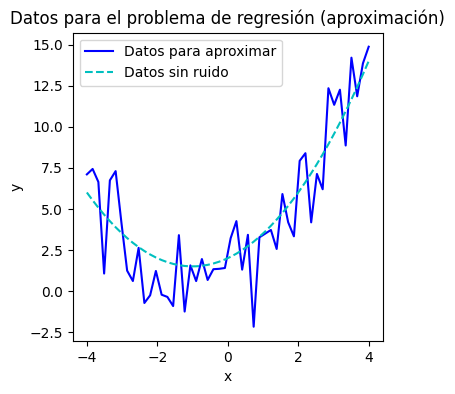

In [32]:
# Como queremos generar conjuntos de datos diferentes no fijamos la semilla del generador de datos aleatorios
x, y, y_limpia = obtencion_datos(ini_x, fin_x, num_puntos, constante_ruido)

# Dibujamos la gráfica con los datos
plt.figure(figsize=(4, 4))
plt.plot(x, y, "b-", label='Datos para aproximar')
plt.plot(x, y_limpia, "c--", label='Datos sin ruido')
plt.title('Datos para el problema de regresión (aproximación)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Generamos M conjuntos de datos diferentes y los guardamos, además calculamos el error cuadrático medio y lo guardamos. En este paso es donde debe escribir el código que falta.

In [33]:
# Número de conjuntos de datos diferentes
M = 20

# Inicilización
y_sal_lineal_total =  np.zeros((M, num_puntos))
y_sal_polinomio_total = np.zeros((M, num_puntos))
error_MSE_regresor_lineal_total = np.zeros(M)
error_MSE_regresor_polinomio_total = np.zeros(M)

# Bucle for
for indice in range(M):
    # Generamos los objetivos
    # Ahora hay que obtener: x, y y los valores de los objetivos sin ruido: y_limpia
    # x e y_limpia no cambian en cada ejecución
    # ESCRIBA EL CÓDIGO QUE FALTA
    

    # Generamos el regresor lineal y las salidas del regresor
    # ESCRIBA EL CÓDIGO QUE FALTA
    

    # Guardamos las salidas del regresor lineal
    y_sal_lineal_guardar = np.transpose(y_sal_lineal)
    y_sal_lineal_total[indice,:] = y_sal_lineal_guardar



    # Calculamos el MSE del regresor lineal
    # ESCRIBA EL CÓDIGO QUE FALTA
   

    # Guardamos el error MSE del regresor lineal
    error_MSE_regresor_lineal_total[indice] = error_MSE_regresor_lineal

    ####################################################################

    # Generamos el regresor polinómico
    # ESCRIBA EL CÓDIGO QUE FALTA

    

    # Guardamos las salidas del regresor polinómico
    y_sal_polinomio_guardar = np.transpose(y_sal_polinomio)
    y_sal_polinomio_total[indice,:] = y_sal_polinomio_guardar

    # Calculamos el MSE del regresor polinómico
    # ESCRIBA EL CÓDIGO QUE FALTA
    

    # Guardamos el error MSE del regresor polinómico
    error_MSE_regresor_polinomio_total[indice] = error_MSE_regresor_polinomio


Vamos a analizar la varianza y el sesgo de cada modelo con una estimación simple:

* En la varianza, con la varianza de las predicciones en cada característica. Veremos lo grande que es la variación de las M predicciones en cada una de las N características.

* En el sesgo, con el error de la media (en teoría debería ser la esperanza) de las predicciones en cada característica. El error es la diferencia entre la media de las predicciones y el valor de la función verdadera, sin ruido, elevada al cuadrado.  

In [34]:
# La estimación de la varianza en los dos modelos es
varianza_modelo_lineal = np.var(y_sal_lineal_total, axis=0)
varianza_modelo_polinomio = np.var(y_sal_polinomio_total, axis=0)

In [35]:
# La estimación del sesgo en los dos modelos es
# Media de las predicciones en cada característica y en cada modelo
media_modelo_lineal = np.mean(y_sal_lineal_total, axis=0)
media_modelo_polinomio = np.mean(y_sal_polinomio_total, axis=0)
# Error: diferencias elevadas al cuadrado
sesgo_modelo_lineal = (media_modelo_lineal.reshape(-1,1) - y_limpia)**2
sesgo_modelo_polinomio = (media_modelo_polinomio.reshape(-1,1) - y_limpia)**2

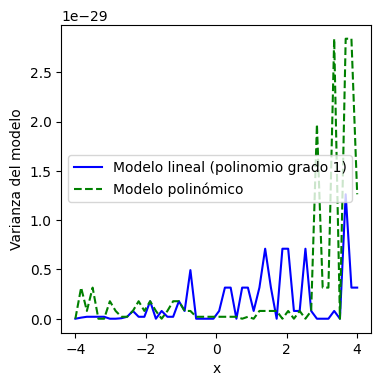

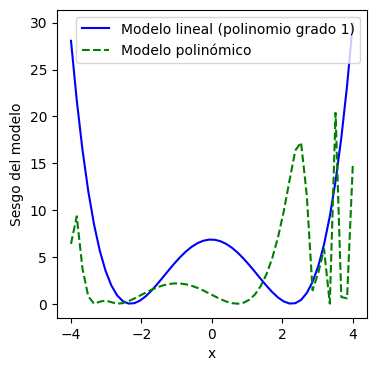

In [36]:
# Dibujamos los valores de estimación del sesgo y la varianza

# Estimación de la varianza
plt.figure(figsize=(4, 4))
plt.plot(x, varianza_modelo_lineal, "b-", label='Modelo lineal (polinomio grado 1)')
plt.plot(x, varianza_modelo_polinomio, "g--", label='Modelo polinómico')
plt.xlabel('x')
plt.ylabel('Varianza del modelo')
plt.legend()

# Estimación del sesgo
plt.figure(figsize=(4, 4))
plt.plot(x, sesgo_modelo_lineal, "b-", label='Modelo lineal (polinomio grado 1)')
plt.plot(x, sesgo_modelo_polinomio, "g--", label='Modelo polinómico')
plt.xlabel('x')
plt.ylabel('Sesgo del modelo')
plt.legend()

El sesgo se podría haber estimado en este ejemplo mediante el error cuadrático medio. Si dibujamos el error cuadrático medio de las M iteraciones, obtenemos:

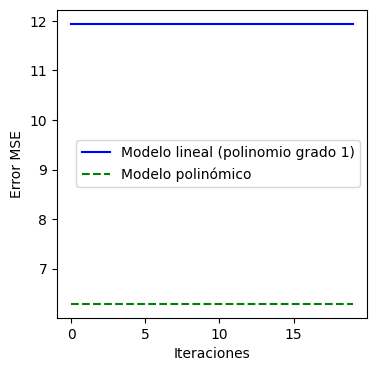

In [37]:
# Eje de abscisas
eje_x_sesgo = np.arange(0, M, 1)

# Dibujamos los diferentes errores MSE
plt.figure(figsize=(4, 4))
plt.plot(eje_x_sesgo, error_MSE_regresor_lineal_total, "b-", label='Modelo lineal (polinomio grado 1)')
plt.plot(eje_x_sesgo, error_MSE_regresor_polinomio_total, "g--", label='Modelo polinómico')
plt.xlabel('Iteraciones')
plt.ylabel('Error MSE')
plt.legend()

**Ejercicio 4: análisis de la varianza y el sesgo**

¿Qué tipo de modelo tiene mayor varianza? ¿Cuál tiene mayor sesgo? Razone las respuestas.